In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# Clean data
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

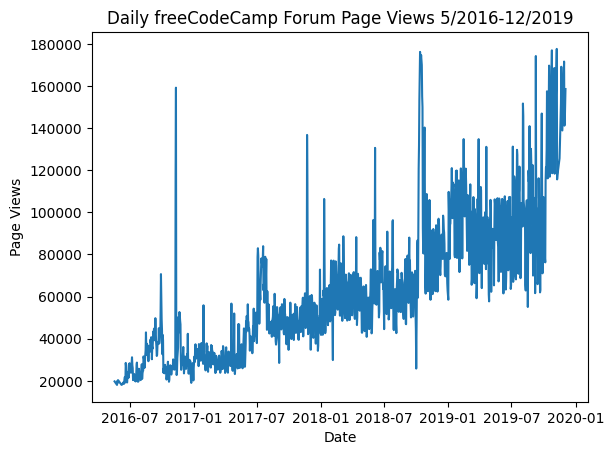

In [2]:
# Draw line plot
#The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
fig, ax = plt.subplots()
ax.plot(df.index,df['value'])
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


# Save image and return fig (don't change this part)
#fig.savefig('line_plot.png')
#return fig

55


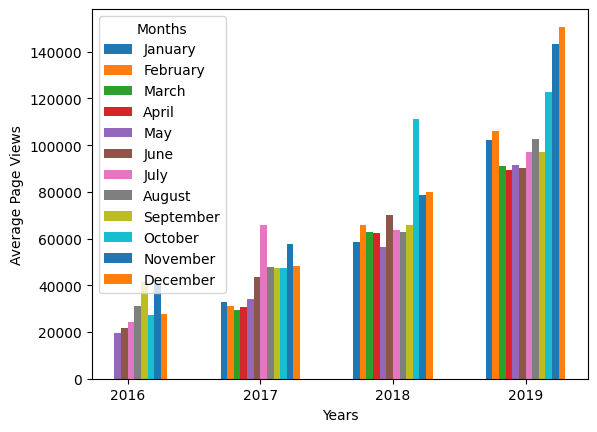

In [ ]:
# Copy and modify data for monthly bar plot
df_bar = pd.pivot_table(df, index = [df.index.month, df.index.year], values = ["value"], aggfunc = 'mean')
df_bar.index.names = ['Month', 'Year']
df_bar = df_bar.rename(columns={"value": "Average"})

years = df_bar.index.get_level_values(1)
months = df_bar.index.get_level_values(0)
averages = df_bar['Average']

add_in_data_so_unit_test_works_indexs = [[1, 2016], [2, 2016], [3, 2016], [4, 2016]]
index = pd.MultiIndex.from_tuples(add_in_data_so_unit_test_works_indexs, names=["Month", "Year"])
add_in_data_so_unit_test_works_averages = [0, 0, 0, 0]
add_in_data_so_unit_test_works_series = pd.DataFrame(add_in_data_so_unit_test_works_averages, index=index, columns=['Average'])
df_bar = df_bar.append(add_in_data_so_unit_test_works_series)

width = 0.05
months_list = [['January', 1, -5.5], ['February', 2, -4.5], ['March', 3, -3.5], ['April', 4, -2.5], ['May', 5, -1.5], ['June', 6, -0.5], ['July', 7, 0.5], ['August', 8, 1.5], ['September', 9, 2.5], ['October', 10, 3.5], ['November', 11, 4.5], ['December', 12, 5.5]]
fig, ax = plt.subplots()
for month, month_no, multiplier in months_list:
    month_data = averages[months==month_no]
    x = years[months==month_no]
    bar = ax.bar(x + (multiplier*width), month_data, width, label=month)

    
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_xticks([2016, 2017, 2018, 2019])
#ax.locator_params(axis='x', nbins=4)
ax.legend(title='Months')


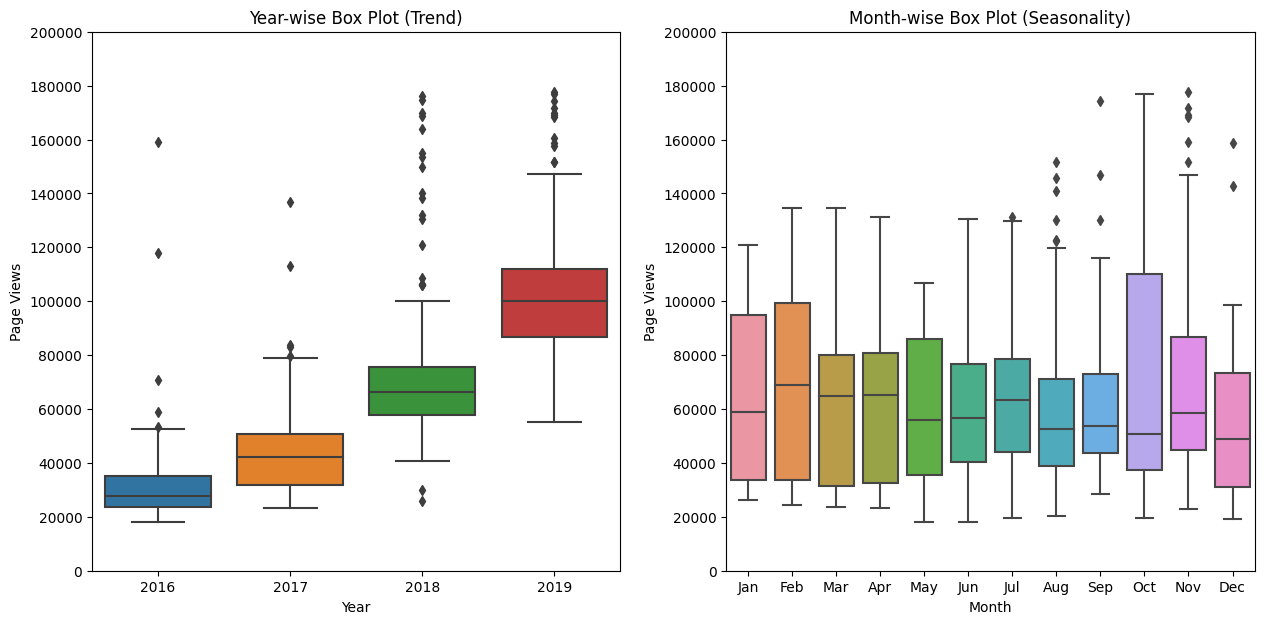

In [91]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

months_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Draw box plots (using Seaborn)
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(7)
sns.boxplot(data=df_box, x='year', y='value', ax=ax[0])

sns.boxplot(data=df_box, x='month', y='value', ax=ax[1], order=months_list)

ax[0].set_title('Year-wise Box Plot (Trend)')
ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Month')
ax[0].set_ylabel('Page Views')
ax[1].set_ylabel('Page Views')
ax[0].set_ylim(0, 200000)
ax[1].set_ylim(0, 200000)
ax[0].locator_params(axis='y', nbins=11)
ax[1].locator_params(axis='y', nbins=11)

# Save image and return fig (don't change this part)
#fig.savefig('box_plot.png')
#return fig